In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('Customer_Segmentation.csv')

In [137]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [138]:
df.drop('CustomerID',axis=1,inplace=True)

In [139]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [140]:
from sklearn.preprocessing import LabelEncoder
Cluster = LabelEncoder()
df.Gender = Cluster.fit_transform(df.Gender)

In [141]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [188]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.517500,50.200000,1.785000
std,0.497633,13.969007,26.143551,25.823522,1.206671
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000
50%,0.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000
max,1.000000,70.000000,132.750000,99.000000,4.000000


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

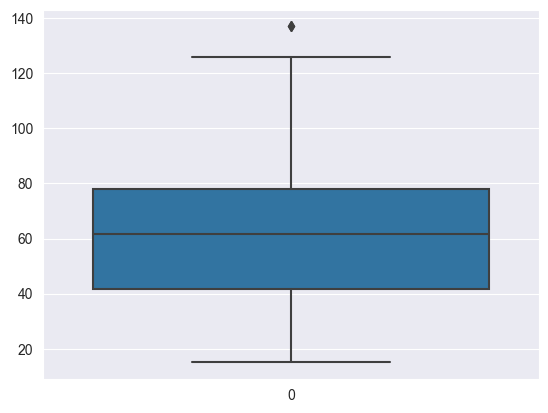

In [143]:
sns.boxplot(df['Annual Income (k$)'])

In [144]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
print(lower_limit,upper_limit)

-13.25 132.75


In [145]:
df_outliers = df.loc[(df['Annual Income (k$)'] < lower_limit) | (df['Annual Income (k$)'] > upper_limit)]
df_outliers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,1,32,137,18
199,1,30,137,83


In [146]:
df.loc[df_outliers.index,'Annual Income (k$)'] = upper_limit

<Axes: >

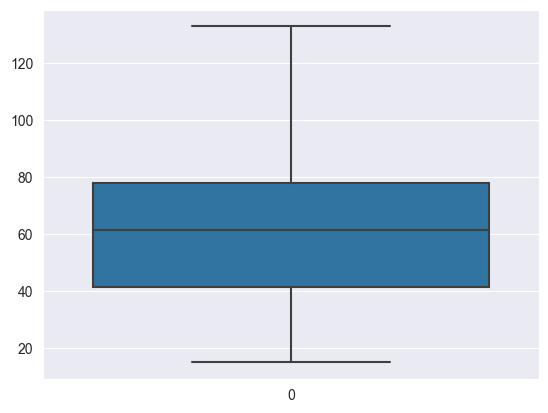

In [147]:
sns.boxplot(df['Annual Income (k$)'])

In [155]:
df.dtypes
df['Annual Income (k$)'].astype('int')

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    132
199    132
Name: Annual Income (k$), Length: 200, dtype: int32

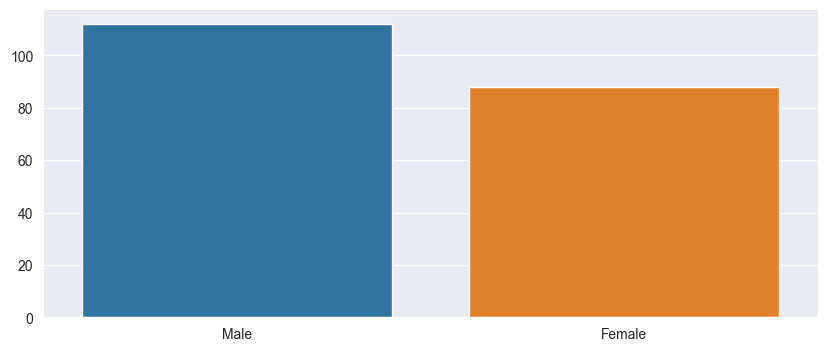

In [148]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

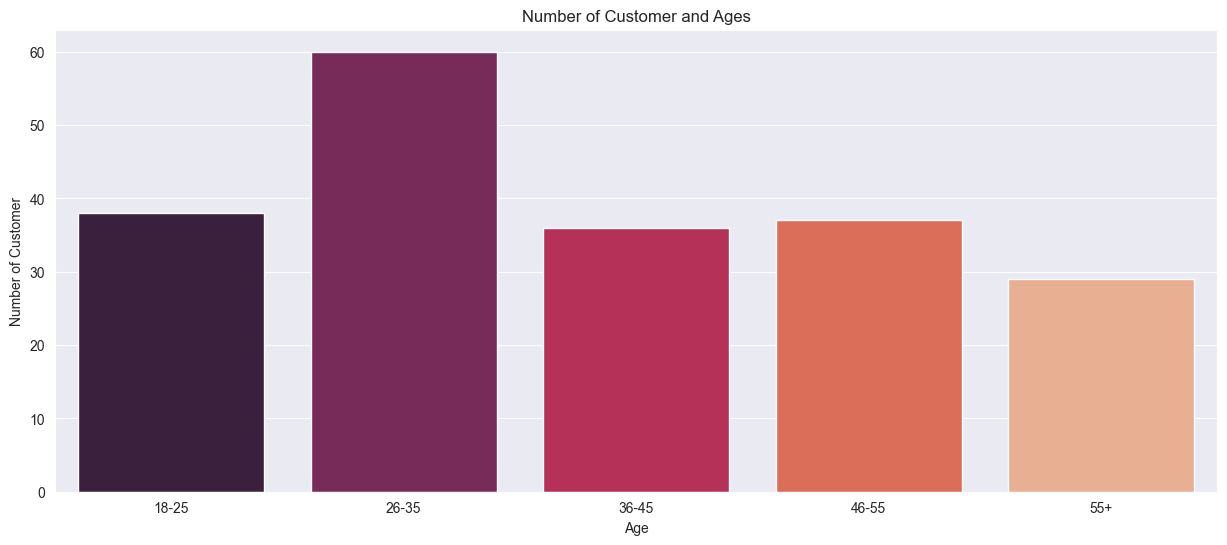

In [149]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

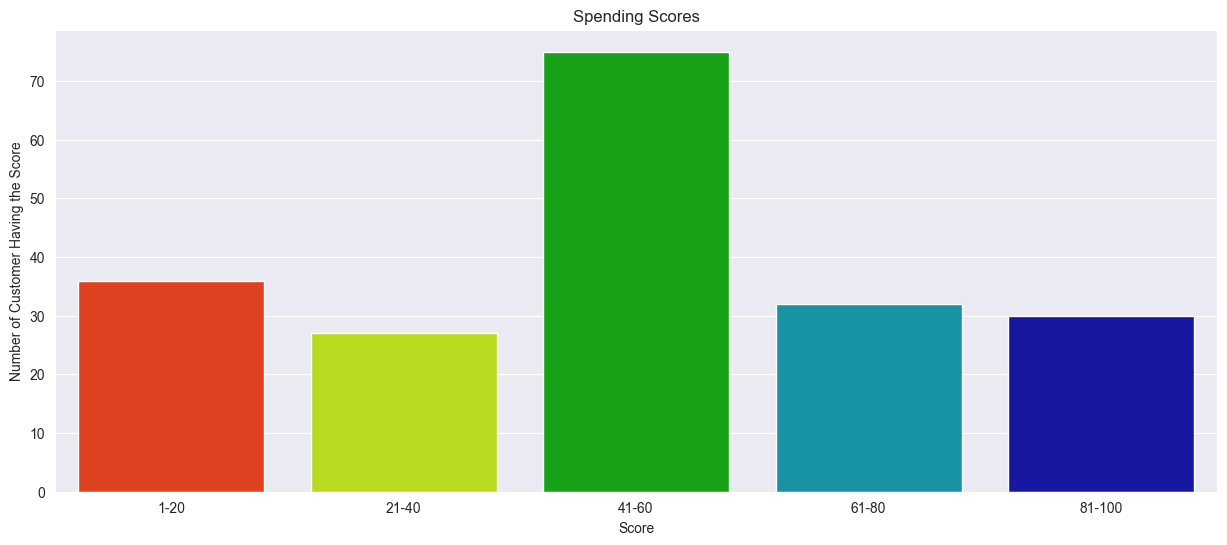

In [150]:

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

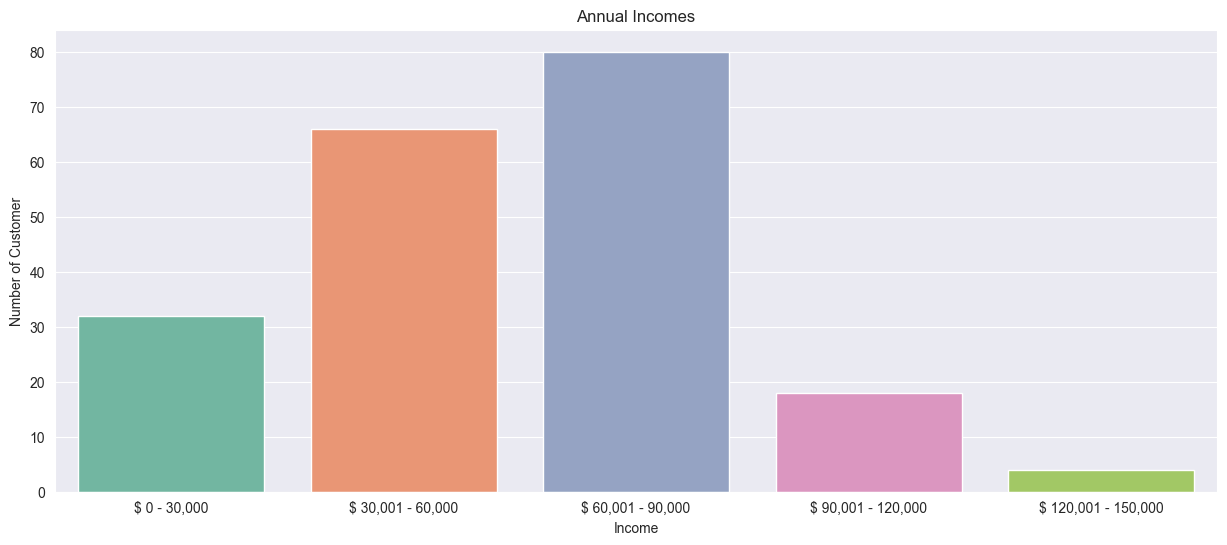

In [151]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [205]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

In [206]:
inertia

[25.45156657449786,
 15.218100136220997,
 9.475201175039775,
 5.635716299855241,
 3.7059738639266686,
 3.0834105708377555,
 2.5658349232678206,
 2.2521368667541575,
 2.017375635233934,
 1.8848570393561488,
 1.7260510661328454,
 1.5349503132756885,
 1.4110253093716585,
 1.329548239028223]

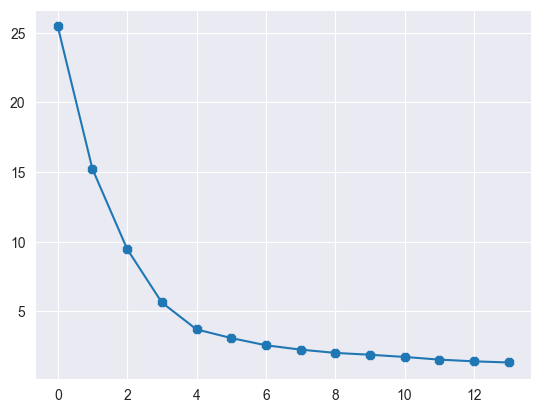

In [207]:
plt.plot(inertia,marker='8')

In [212]:
kmeans = KMeans(n_clusters=5,init='k-means++')
df['Cluster'] = kmeans.fit_predict(scaled)

In [163]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15.0,39,4
1,1,21,15.0,81,0
2,0,20,16.0,6,4
3,0,23,16.0,77,0
4,0,31,17.0,40,4


In [ ]:
import numpy as np

In [201]:
a = df[['Age','Spending Score (1-100)']].loc[df['Cluster'] == 1]
a.head()

,Age,Spending Score (1-100)
46,50,55
47,27,47
48,29,42
49,31,42
50,49,52


In [180]:
centroids = kmeans.cluster_centers_

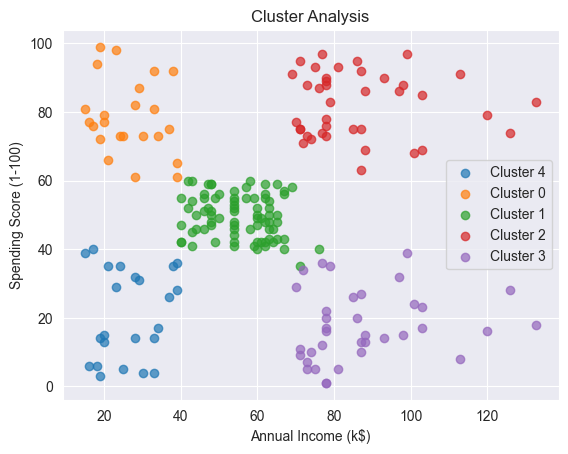

In [182]:
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)
    

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Analysis')
plt.legend()
plt.grid(True)
plt.show()

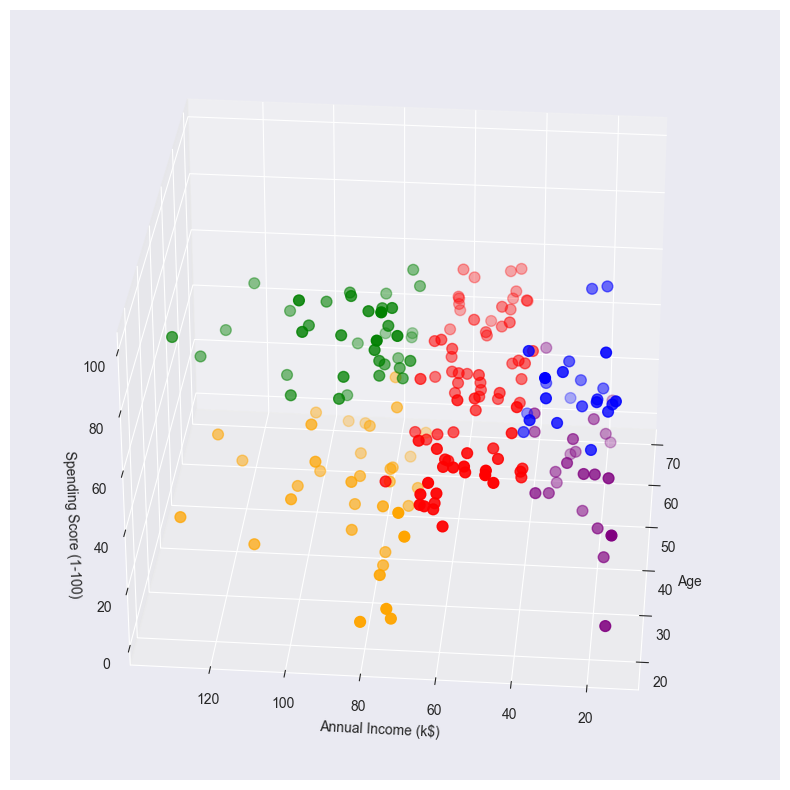

In [186]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=60)
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Before

In [202]:
from sklearn.metrics import silhouette_score
silhouette_score(df.iloc[:,:-1],df.iloc[:,-1])

0.4449124013060959

In [203]:
from sklearn.preprocessing import normalize
scaled = normalize(df.iloc[:,:-1])

Scaled

In [216]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled,df.iloc[:,-1])

0.5433336935220275